Throughout this course I will be interested in applying statistical/machine learning/AI predictive methods to the financial markets. I have selected 3 datasets that represent inflation, company earnings and stock market performance over time. I am interested to see firsthand how inflation impacts corporate earnings and how that is reflected in stock prices over time.

**S&P 500 Index (2011 - 2024)**
A stock market index tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States. It includes approximately 80% of the total market capitalization of U.S. and is thus a good indicator of how the stock market is performing.<br>Data: [Source](https://finance.yahoo.com/quote/%5EGSPC/history/?period1=1293840000&period2=1718636333&frequency=1mo)

**US Inflation Dataset (1947 - 2023)**
Historical inflation rates for the United States, from January 1947 to 2023. The inflation rate is a significant economic indicator, offering insights into the health of the economy and the purchasing power of a currency. The CPI is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.<br>Data: [Source](https://www.kaggle.com/datasets/pavankrishnanarne/us-inflation-dataset-1947-present)

**S&P 500 Earnings Per Share (2011 - 2023)**
The composite Earnings Per Share for the S&P500. Provides an idea of the overall EPS earned from the major US companies.<br>Data: [Source](https://ycharts.com/indicators/sp_500_eps#:~:text=Basic%20Info,share%20for%20the%20S%26P%20500.)<br>Data: [Download](https://drive.google.com/file/d/1p-fqlmS1vkUavszbJZb4a14bZR2FfaDQ/view?usp=drive_link)

In [130]:
import pandas as pd
import os

#Make directory called plots
os.makedirs("plots", exist_ok=True)

earnings_data_raw = pd.read_csv("./data/SP500_Earnings_Per_Share.csv")
market_data_raw = pd.read_csv("./data/SPX.csv")
inflation_data_raw = pd.read_csv("./data/US_inflation_rates.csv")

In [132]:
#Verify earnings data
earnings_data_raw.head()

,Date,Value
0,"December 31, 2023",47.79
1,"September 30, 2023",47.65
2,"June 30, 2023",48.58
3,"March 31, 2023",48.41
4,"December 31, 2022",39.61


In [134]:
#Verify market data
market_data_raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-01,1257.619995,1302.670044,1257.619995,1286.119995,1286.119995,92164940000
1,2011-02-01,1289.140015,1344.069946,1289.140015,1327.219971,1327.219971,59223660000
2,2011-03-01,1328.640015,1332.280029,1249.050049,1325.829956,1325.829956,89507640000
3,2011-04-01,1329.479980,1364.560059,1294.699951,1363.609985,1363.609985,77364810000
4,2011-05-01,1365.209961,1370.579956,1311.800049,1345.199951,1345.199951,81708980000


In [136]:
#Verify inflation data
inflation_data_raw.head()

,date,value
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


AttributeError: 'DataFrame' object has no attribute 'Name'

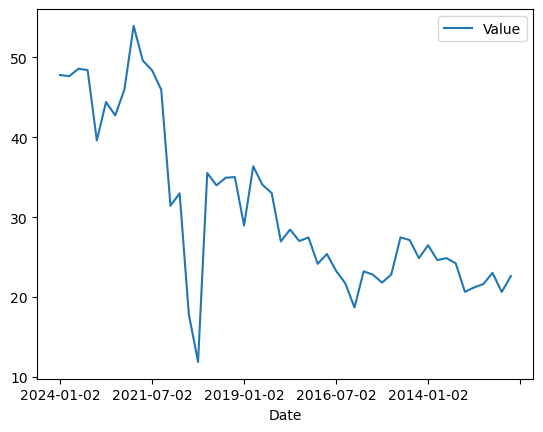

In [140]:
#Clean up earnings data
#Reverse the order of the rows
earnings_data_raw = earnings_data_raw.iloc[::-1].reset_index(drop=True)

# Convert the 'Date' column to datetime and add one day
earnings_data_raw['Date'] = pd.to_datetime(earnings_data_raw['Date']) + pd.Timedelta(days=1)

# Format the dates to 'YYYY-mm-dd'
earnings_data_raw['Date'] = earnings_data_raw['Date'].dt.strftime('%Y-%m-%d')

# Calculate percentage change from the previous row
earnings_data_raw['% Change'] = earnings_data_raw['Value'].pct_change() * 100

# Replace NaN in the first row with '-'
earnings_data_raw['% Change'] = earnings_data_raw['% Change'].fillna('-')

earnings_data = earnings_data_raw

#Save the cleaned earnings data as a CSV file
#earnings_data.to_csv('./data/out/earnings_data.csv')

lines = earnings_data.plot.line(x='Date', y='Value')


lines.set_xticklabels(earnings_data.Name, rotation=90) 
linepng = lines.figure.savefig('plots/out/earnings_linegraph.png')

print(lines)

earnings_data.head()

In [128]:
#Clean up market data
# Create a new DataFrame with only 'Date' and 'Close' columns
market_data_raw = market_data_raw[['Date', 'Close']]

# Rename the 'Close' column to 'Value'
market_data_raw = market_data_raw.rename(columns={'Close': 'Value'})

# Convert 'Date' to datetime
#market_data_raw['Date'] = pd.to_datetime(market_data_raw['Date'])

# Convert the 'Date' column to datetime and add one day
market_data_raw['Date'] = pd.to_datetime(market_data_raw['Date']) + pd.Timedelta(days=1)

# Set 'Date' as the index
market_data_raw.set_index('Date', inplace=True)

# Resample to quarterly frequency and calculate the mean value for each quarter
market_data_raw = market_data_raw['Value'].resample('Q').mean()

# Reset the index to turn the 'Date' index back into a column
market_data_raw = market_data_raw.reset_index()

# Calculate percentage change from the previous row
market_data_raw['% Change'] = market_data_raw['Value'].pct_change() * 100

# Replace NaN in the first row with '-'
market_data_raw['% Change'] = market_data_raw['% Change'].fillna('-')

print(market_data_raw)

KeyError: "['Close'] not in index"